In [2]:
import json
import requests

response = requests.get('https://api.github.com/users/USERNAME/subscriptions')

results


NameError: name 'results' is not defined

In [12]:
import pandas as pd
data = pd.DataFrame(results)
data.head(10)


,id,type,actor,repo,payload,public,created_at,org
0,26644825588,DeleteEvent,"{'id': 49699333, 'login': 'dependabot[bot]', '...","{'id': 562798365, 'name': 'ckousik/js-libp2p',...",{'ref': 'dependabot/npm_and_yarn/libp2p/peer-i...,True,2023-01-25T09:09:32Z,NaN
1,26644825622,PushEvent,"{'id': 10453508, 'login': 'mpiot', 'display_lo...","{'id': 369625874, 'name': 'mpiot/status-aviron...","{'push_id': 12395759549, 'size': 1, 'distinct_...",True,2023-01-25T09:09:32Z,NaN
2,26644825640,PushEvent,"{'id': 39814207, 'login': 'pull[bot]', 'displa...","{'id': 292554280, 'name': 'httpsgithu/Trackers...","{'push_id': 12395759530, 'size': 1, 'distinct_...",True,2023-01-25T09:09:32Z,NaN
3,26644825637,CreateEvent,"{'id': 76196156, 'login': 'MalavRohit02', 'dis...","{'id': 593111739, 'name': 'MalavRohit02/IT314_...","{'ref': None, 'ref_type': 'repository', 'maste...",True,2023-01-25T09:09:32Z,NaN
4,26644825650,IssuesEvent,"{'id': 58777767, 'login': 'rvanvliet', 'displa...","{'id': 371655252, 'name': 'INL/ivdnt-statusove...","{'action': 'opened', 'issue': {'url': 'https:/...",True,2023-01-25T09:09:32Z,"{'id': 2195496, 'login': 'INL', 'gravatar_id':..."
5,26644825633,CreateEvent,"{'id': 42886855, 'login': 'ArSrNa', 'display_l...","{'id': 593111740, 'name': 'ArSrNa/static-resou...","{'ref': None, 'ref_type': 'repository', 'maste...",True,2023-01-25T09:09:32Z,NaN
6,26644825542,PushEvent,"{'id': 49699333, 'login': 'dependabot[bot]', '...","{'id': 585840362, 'name': 'Gosunet/dependabota...","{'push_id': 12395759468, 'size': 9, 'distinct_...",True,2023-01-25T09:09:32Z,NaN
7,26644825585,PushEvent,"{'id': 41898282, 'login': 'github-actions[bot]...","{'id': 404532305, 'name': 'ecafkoob/just4fun',...","{'push_id': 12395759491, 'size': 1, 'distinct_...",True,2023-01-25T09:09:32Z,NaN
8,26644825612,PushEvent,"{'id': 121162287, 'login': 'loxingle', 'displa...","{'id': 593058665, 'name': 'loxingle/DNCFF', 'u...","{'push_id': 12395759534, 'size': 1, 'distinct_...",True,2023-01-25T09:09:32Z,NaN
9,26644825555,PushEvent,"{'id': 101126520, 'login': 'LeoX88886', 'displ...","{'id': 581282415, 'name': 'garyniu/ICS4U1-Fina...","{'push_id': 12395759488, 'size': 2, 'distinct_...",True,2023-01-25T09:09:32Z,NaN


In [1]:
data.to_Excel

NameError: name 'data' is not defined

In [13]:
response = requests.get('https://api.github.com/users/USERNAME/subscriptions')

data = pd.DataFrame(response.json())
data.head(10)


ValueError: If using all scalar values, you must pass an index

In [4]:
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data
nested_columns = ['actor', 'org', 'payload', 'repo']

flat = flatten(data, nested_columns)


flat.head(10)


,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_master_branch,payload_description,payload_action,payload_issue,payload_comment,payload_number,payload_pull_request,repo_id,repo_name,repo_url
0,26644825588,DeleteEvent,True,2023-01-25T09:09:32Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562798365,ckousik/js-libp2p,https://api.github.com/repos/ckousik/js-libp2p
1,26644825622,PushEvent,True,2023-01-25T09:09:32Z,10453508,mpiot,mpiot,,https://api.github.com/users/mpiot,https://avatars.githubusercontent.com/u/10453508?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,369625874,mpiot/status-avirontours,https://api.github.com/repos/mpiot/status-avir...
2,26644825640,PushEvent,True,2023-01-25T09:09:32Z,39814207,pull[bot],pull,,https://api.github.com/users/pull[bot],https://avatars.githubusercontent.com/u/39814207?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292554280,httpsgithu/TrackersListCollection,https://api.github.com/repos/httpsgithu/Tracke...
3,26644825637,CreateEvent,True,2023-01-25T09:09:32Z,76196156,MalavRohit02,MalavRohit02,,https://api.github.com/users/MalavRohit02,https://avatars.githubusercontent.com/u/76196156?,...,main,None,NaN,NaN,NaN,NaN,NaN,593111739,MalavRohit02/IT314_LAB01,https://api.github.com/repos/MalavRohit02/IT31...
4,26644825650,IssuesEvent,True,2023-01-25T09:09:32Z,58777767,rvanvliet,rvanvliet,,https://api.github.com/users/rvanvliet,https://avatars.githubusercontent.com/u/58777767?,...,NaN,NaN,opened,{'url': 'https://api.github.com/repos/INL/ivdn...,NaN,NaN,NaN,371655252,INL/ivdnt-statusoverzicht,https://api.github.com/repos/INL/ivdnt-statuso...
5,26644825633,CreateEvent,True,2023-01-25T09:09:32Z,42886855,ArSrNa,ArSrNa,,https://api.github.com/users/ArSrNa,https://avatars.githubusercontent.com/u/42886855?,...,master,None,NaN,NaN,NaN,NaN,NaN,593111740,ArSrNa/static-resource,https://api.github.com/repos/ArSrNa/static-res...
6,26644825542,PushEvent,True,2023-01-25T09:09:32Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585840362,Gosunet/dependabotandrefresh,https://api.github.com/repos/Gosunet/dependabo...
7,26644825585,PushEvent,True,2023-01-25T09:09:32Z,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404532305,ecafkoob/just4fun,https://api.github.com/repos/ecafkoob/just4fun
8,26644825612,PushEvent,True,2023-01-25T09:09:32Z,121162287,loxingle,loxingle,,https://api.github.com/users/loxingle,https://avatars.githubusercontent.com/u/121162...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,593058665,loxingle/DNCFF,https://api.github.com/repos/loxingle/DNCFF
9,26644825555,PushEvent,True,2023-01-25T09:09:32Z,101126520,LeoX88886,LeoX88886,,https://api.github.com/users/LeoX88886,https://avatars.githubusercontent.com/u/101126...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581282415,garyniu/ICS4U1-Final-Project,https://api.github.com/repos/garyniu/ICS4U1-Fi...


In [5]:

results = response.json()
flattened_data = pd.json_normalize(results)

flattened_data


,id,type,public,created_at,actor.id,actor.login,actor.display_login,actor.gravatar_id,actor.url,actor.avatar_url,...,payload.pull_request.head.repo.license.name,payload.pull_request.head.repo.license.spdx_id,payload.pull_request.head.repo.license.url,payload.pull_request.head.repo.license.node_id,payload.pull_request.base.repo.license.key,payload.pull_request.base.repo.license.name,payload.pull_request.base.repo.license.spdx_id,payload.pull_request.base.repo.license.url,payload.pull_request.base.repo.license.node_id,payload.pull_request.merged_by
0,26644825588,DeleteEvent,True,2023-01-25T09:09:32Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26644825622,PushEvent,True,2023-01-25T09:09:32Z,10453508,mpiot,mpiot,,https://api.github.com/users/mpiot,https://avatars.githubusercontent.com/u/10453508?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26644825640,PushEvent,True,2023-01-25T09:09:32Z,39814207,pull[bot],pull,,https://api.github.com/users/pull[bot],https://avatars.githubusercontent.com/u/39814207?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26644825637,CreateEvent,True,2023-01-25T09:09:32Z,76196156,MalavRohit02,MalavRohit02,,https://api.github.com/users/MalavRohit02,https://avatars.githubusercontent.com/u/76196156?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26644825650,IssuesEvent,True,2023-01-25T09:09:32Z,58777767,rvanvliet,rvanvliet,,https://api.github.com/users/rvanvliet,https://avatars.githubusercontent.com/u/58777767?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,26644825633,CreateEvent,True,2023-01-25T09:09:32Z,42886855,ArSrNa,ArSrNa,,https://api.github.com/users/ArSrNa,https://avatars.githubusercontent.com/u/42886855?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,26644825542,PushEvent,True,2023-01-25T09:09:32Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,26644825585,PushEvent,True,2023-01-25T09:09:32Z,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,26644825612,PushEvent,True,2023-01-25T09:09:32Z,121162287,loxingle,loxingle,,https://api.github.com/users/loxingle,https://avatars.githubusercontent.com/u/121162...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,26644825555,PushEvent,True,2023-01-25T09:09:32Z,101126520,LeoX88886,LeoX88886,,https://api.github.com/users/LeoX88886,https://avatars.githubusercontent.com/u/101126...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
response = requests.get('https://api.github.com/users/USERNAME/subscriptions')

data = pd.DataFrame(response.json())
data.head(10)

ValueError: If using all scalar values, you must pass an index

In [14]:
! pip install tweepy

In [15]:

import tweepy
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAF1KWgEAAAAAr9aUi8nUm5nZGkkgGfN3KQLHonE%3DSWNdoqTA8dhCfwGGZ8lECgGi1Fzj7NmUnbmtRxh7W6lq43s2Ia')
# Replace with your own search query
query = 'Ironhack'
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100)
for tweet in tweets.data:
   print(tweet.text)
   if len(tweet.context_annotations) > 0:
       print(tweet.context_annotations)



La escuela tecnológica Ironhack, veterana de los #bootcamps en España, centra su oferta formativa en posiciones con alta empleabilidad Léelo en: @cronicaglobal https://t.co/th9kOlSd2R
Re-designing an E-Commerce responsive website — Ironhack https://t.co/Se1o2CEtpI #uxuidesign #uxdesigner #uiuxdesign #productdesign
[{'domain': {'id': '46', 'name': 'Business Taxonomy', 'description': 'Categories within Brand Verticals that narrow down the scope of Brands'}, 'entity': {'id': '1557697333571112960', 'name': 'Technology Business', 'description': 'Brands, companies, advertisers and every non-person handle with the profit intent related to softwares, apps, communication equipments, hardwares'}}, {'domain': {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'}, 'entity': {'id': '848920371311001600', 'name': 'Technology', 'description': 'Technology and computing'}}, {'domain': {'id': '131

In [16]:
import tweepy
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'],
                                    user_fields=['profile_image_url'], expansions='author_id', max_results=100)
# Get users list from the includes object
users = {u["id"]: u for u in tweets.includes['users']}
for tweet in tweets.data:
    if users[tweet.author_id]:
        user = users[tweet.author_id]
        print(user.profile_image_url)


https://pbs.twimg.com/profile_images/1164841198919401472/Xaok-dXu_normal.jpg
https://pbs.twimg.com/profile_images/1579237708861681664/OsBgbID6_normal.jpg
https://pbs.twimg.com/profile_images/1128002304786018304/0o-ON6g8_normal.png
https://pbs.twimg.com/profile_images/1356112347807408130/jCYrr2m6_normal.jpg
https://pbs.twimg.com/profile_images/1221805770435710977/FF_Y821B_normal.jpg
https://pbs.twimg.com/profile_images/1401527956015550466/u0wH49zH_normal.jpg
https://pbs.twimg.com/profile_images/1617660058044702720/zkPSD3Vj_normal.png
https://pbs.twimg.com/profile_images/1617659715990716416/rSLOGxae_normal.png
https://pbs.twimg.com/profile_images/1617658963025174529/pzshjMwv_normal.png
https://pbs.twimg.com/profile_images/1617652878084083717/KtzOnAuq_normal.png
https://pbs.twimg.com/profile_images/1617650862054150144/bbqhGobP_normal.png
https://pbs.twimg.com/profile_images/1617649582762086400/bXn2k_qZ_normal.png
https://pbs.twimg.com/profile_images/1617629593170501635/tMnoJ1QA_normal.png

In [18]:
query = 'covid -is:retweet has:media lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'],
                                media_fields=['preview_image_url'], expansions='attachments.media_keys', max_results=100)
# Get list of media from the includes object
media = {m["media_key"]: m for m in tweets.includes['media']}
for tweet in tweets.data:
    attachments = tweet.data['attachments']
    media_keys = attachments['media_keys']
    print(tweet.text)
    if media[media_keys[0]].preview_image_url:
         print(media[media_keys[0]].preview_image_url)

@JohnnyBruce1970 @PRGuy17 This is evidence that Covid vaccines cause myocarditis https://t.co/jsaHUytDSO
@MartinaSisters @VBruttel @Jikkyleaks @tony_vandongen @raqueltobes 'Yousen Zhou' of the 'Beijing Institute of Microbiology and Epidemiology' already knew of the 'devastating effects' of COVID-19 by Feb 24th '20, and filed a Patent for a vaccine against it on behalf of the PLA?? Unfortunately, he went missing 👇
https://t.co/RH9NLgKSsB https://t.co/PNX4le3o52
More than 1 in 4 working UK adults are less satisfied with their jobs after the COVID pandemic, with nearly half equally satisfied and just under 1 in 4 more satisfied.

Find out more by downloading the report below.

https://t.co/gOFdIXCxZM

#MoodoftheNation #JanDiet #NewYear https://t.co/MpIB1ECMIw
China’s Rapid Post-Covid Renormalization - ⁦@SoberLook⁩ ⁦@RealAlpineMacro⁩ https://t.co/Hix3QgZCOv
@JohnnyBruce1970 @PRGuy17 This is evidence that Covid doesn’t cause myocarditis https://t.co/SFMnLIiAOd
Why didn't Pfizer's Covid vacc

In [19]:
! pip install wbgapi

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb

In [21]:
help(wb)

Help on package wbgapi:

NAME
    wbgapi

DESCRIPTION
    wbgapi provides a comprehensive interface to the World Bank's data and
    metadata API with built-in pandas integration

PACKAGE CONTENTS
    __version__
    data
    economy
    economy_coder
    economy_metadata
    income
    lending
    region
    series
    series_metadata
    source
    time
    topic
    utils

CLASSES
    builtins.Exception(builtins.BaseException)
        APIError
            APIResponseError
        URLError
    builtins.dict(builtins.object)
        Coder
    builtins.object
        Featureset
        Metadata
        MetadataCollection
    
    class APIError(builtins.Exception)
     |  APIError(url, msg, code=None)
     |  
     |  Method resolution order:
     |      APIError
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, url, msg, code=None)
     |      Initialize self.  See help(t

In [22]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-12-22
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [24]:
wb.economy.info()

id,value,region,incomeLevel
ABW,Aruba,LCN,HIC
AFE,Africa Eastern and Southern,,
AFG,Afghanistan,SAS,LIC
AFW,Africa Western and Central,,
AGO,Angola,SSF,LMC
ALB,Albania,ECS,UMC
AND,Andorra,ECS,HIC
ARB,Arab World,,
ARE,United Arab Emirates,MEA,HIC
ARG,Argentina,LCN,UMC


In [25]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [3]:
wb.series.info(q="energy")

NameError: name 'wb' is not defined

In [28]:
wb.series.info(q="gender")

id,value
IQ.CPA.GNDR.XQ,CPIA gender equality rating (1=low to 6=high)
SE.ADT.1524.LT.FM.ZS,"Literacy rate, youth (ages 15-24), gender parity index (GPI)"
SE.ENR.PRIM.FM.ZS,"School enrollment, primary (gross), gender parity index (GPI)"
SE.ENR.PRSC.FM.ZS,"School enrollment, primary and secondary (gross), gender parity index (GPI)"
SE.ENR.SECO.FM.ZS,"School enrollment, secondary (gross), gender parity index (GPI)"
SE.ENR.TERT.FM.ZS,"School enrollment, tertiary (gross), gender parity index (GPI)"
,6 elements


In [56]:
business=wb.data.DataFrame('IC.REG.PROC',wb.region.members('ECS'))
business

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN,NaN
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,NaN,NaN
AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
BEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
BGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,NaN,NaN
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,NaN,NaN
BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,NaN,NaN


In [33]:
business=wb.data.DataFrame('SG.LAW.INDX',wb.region.members('ECS'))
business

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.625,85.625,85.625,85.625,91.250,91.250,91.250,91.250,91.250,91.250
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.500,82.500,82.500,82.500,82.500,82.500,85.000,85.000,85.000,87.500
AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.250,91.250,94.375,94.375,94.375,94.375,94.375,94.375,96.875,96.875
AZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.750,78.750,78.750,78.750,78.750,78.750,78.750,78.750,78.750,78.750
BEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
BGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.625,90.625,90.625,90.625,90.625,90.625,90.625,90.625,90.625,90.625
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.875,81.875,81.875,81.875,85.000,88.125,85.000,85.000,85.000,85.000
BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.125,73.125,75.625,75.625,75.625,75.625,75.625,75.625,75.625,75.625


In [ ]:
df.

In [57]:
ren=wb.data.DataFrame('IC.REG.PROC',['FRA','VNM','USA'],time=range(2012,2020))
ren


,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,
FRA,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
USA,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0
VNM,9.0,9.0,9.0,9.0,9.0,9.0,8.0,8.0


In [50]:
ren=wb.data.DataFrame('IC.REG.DURS',['FRA','UKR','EST'],time=range(2003,2020))
ren

,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,,,,,,,,
EST,72.0,72.0,35.0,35.0,6.5,6.5,6.5,6.5,6.5,6.5,6.5,4.5,3.5,3.5,3.5,3.5,3.5
FRA,41.0,7.0,7.0,7.0,7.0,6.5,6.5,6.5,6.5,6.5,6.5,4.5,4.0,3.5,3.5,3.5,4.0
UKR,41.0,35.0,35.0,34.0,28.0,28.0,28.0,28.0,25.0,23.0,22.0,22.0,8.0,6.5,6.5,6.5,6.5


<AxesSubplot:xlabel='economy'>

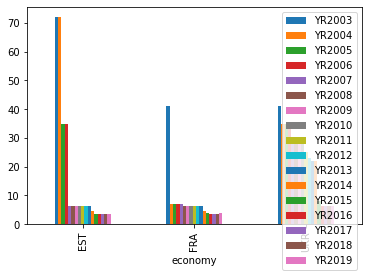

In [37]:
ren.plot.bar()

<AxesSubplot:>

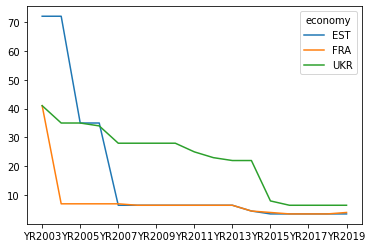

In [39]:
ren.T.plot()

<AxesSubplot:xlabel='economy'>

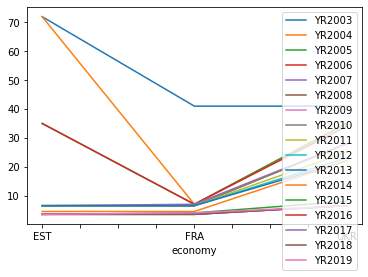

In [40]:
ren.plot()

<AxesSubplot:>

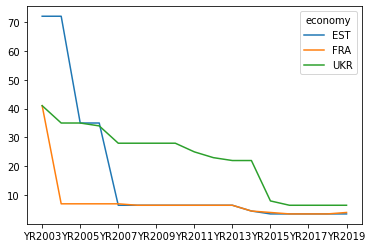

In [38]:
wb.data.DataFrame('IC.REG.DURS',['FRA','UKR','EST'],time=range(2003,2020)).T.plot()

In [51]:
g5=business.sort_values(by=['YR2019'],ascending=False)[:3]
g5

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
LUX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.500,97.5,97.5,100.0,100.0,100.0,100.0,100.0,100.0,100.0
LVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.500,97.5,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
SWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.875,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [52]:
g5=business.sort_values(by=['YR2019'],ascending=True)[:3]
g5

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
UZB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.375,64.375,64.375,64.375,64.375,64.375,64.375,67.500,70.625,70.625
KAZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.500,72.500,72.500,72.500,69.375,69.375,69.375,69.375,69.375,69.375
RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.125,73.125,73.125,73.125,73.125,73.125,73.125,73.125,73.125,73.125


<AxesSubplot:>

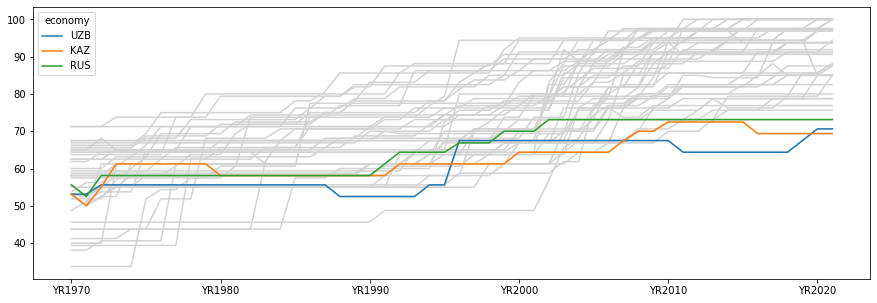

In [53]:
ax=business.T.plot(color='lightgray',legend=False)
g5.T.plot(ax=ax,figsize=(15,5))

In [ ]:
g5.T.plot